<a href="https://colab.research.google.com/github/Ravindu9004/DissertationRepository/blob/main/fakenews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn
import itertools
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import numpy as np
import pandas as pd
import itertools


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [5]:
import io
fake_df = pd.read_csv(io.BytesIO(uploaded['Fake.csv']))

In [6]:
len(fake_df)

23481

In [7]:
uploaded1 = files.upload()

Saving True.csv to True.csv


In [8]:
true_df = pd.read_csv(io.BytesIO(uploaded1['True.csv']))

In [9]:
len(true_df)

21417

In [10]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [11]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [12]:
#Checking for duplicates in title column
fake_df[fake_df.duplicated(subset="title")]

,title,text,subject,date
1535,McConnell Says He’ll Obstruct ANY Effort To H...,Siding with Trump s Attorney General Jeff Sess...,News,"May 10, 2017"
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
10920,MEDIA IGNORES Time That Bill Clinton FIRED His...,At the recommendation of both Attorney General...,politics,"May 10, 2017"
10924,MEDIA IGNORES Time That Bill Clinton FIRED His...,"In its 109-year history, only one F.B.I. direc...",politics,"May 10, 2017"
10930,FORMER FBI ASST DIRECTOR: “Jim Comey ‘Danced W...,He threw the reputation of the FBI under the ...,politics,"May 9, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [13]:
fake_df = fake_df.drop_duplicates()

In [14]:
fake_df.isnull().values.any()

False

In [15]:
len(fake_df)

23478

In [16]:
fake_df.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [17]:
#Checking for duplicates in title column
true_df[true_df.duplicated(subset="title")]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017"
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017"
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"


In [18]:
true_df = true_df.drop_duplicates()

In [19]:
true_df.isnull().values.any()

False

In [20]:
len(true_df)

21211

In [21]:
fake_df['Label'] = 'Fake'
true_df['Label'] = 'True'

In [22]:
result = pd.concat([true_df,fake_df],axis=0)
result.head()

,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [23]:
#Shuffling the dataframe to get a sample view of all true and fake news
result = result.sample(frac=1).reset_index(drop=True)
result.head()

,title,text,subject,date,Label
0,HYSTERICAL! HILLARY CLINTON Upstaged By Man Be...,A man with stickers on his face must have been...,politics,"Feb 2, 2016",Fake
1,U.S. calls on China to use 'powerful tool' of ...,LONDON (Reuters) - U.S. Secretary of State Rex...,worldnews,"September 14, 2017",True
2,Trump Tweets Lie About America’s Third Bigges...,Donald Trump has been tweeting all day and h...,News,"June 22, 2017",Fake
3,Trump: I Don’t Meet With The Press Because Th...,Donald Trump once bragged that he had the bes...,News,"December 14, 2016",Fake
4,British PM May says lawmakers to vote on final...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"December 13, 2017",True


In [24]:
len(result)

44689

In [25]:
result.isnull().values.any()

False

In [26]:
result.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

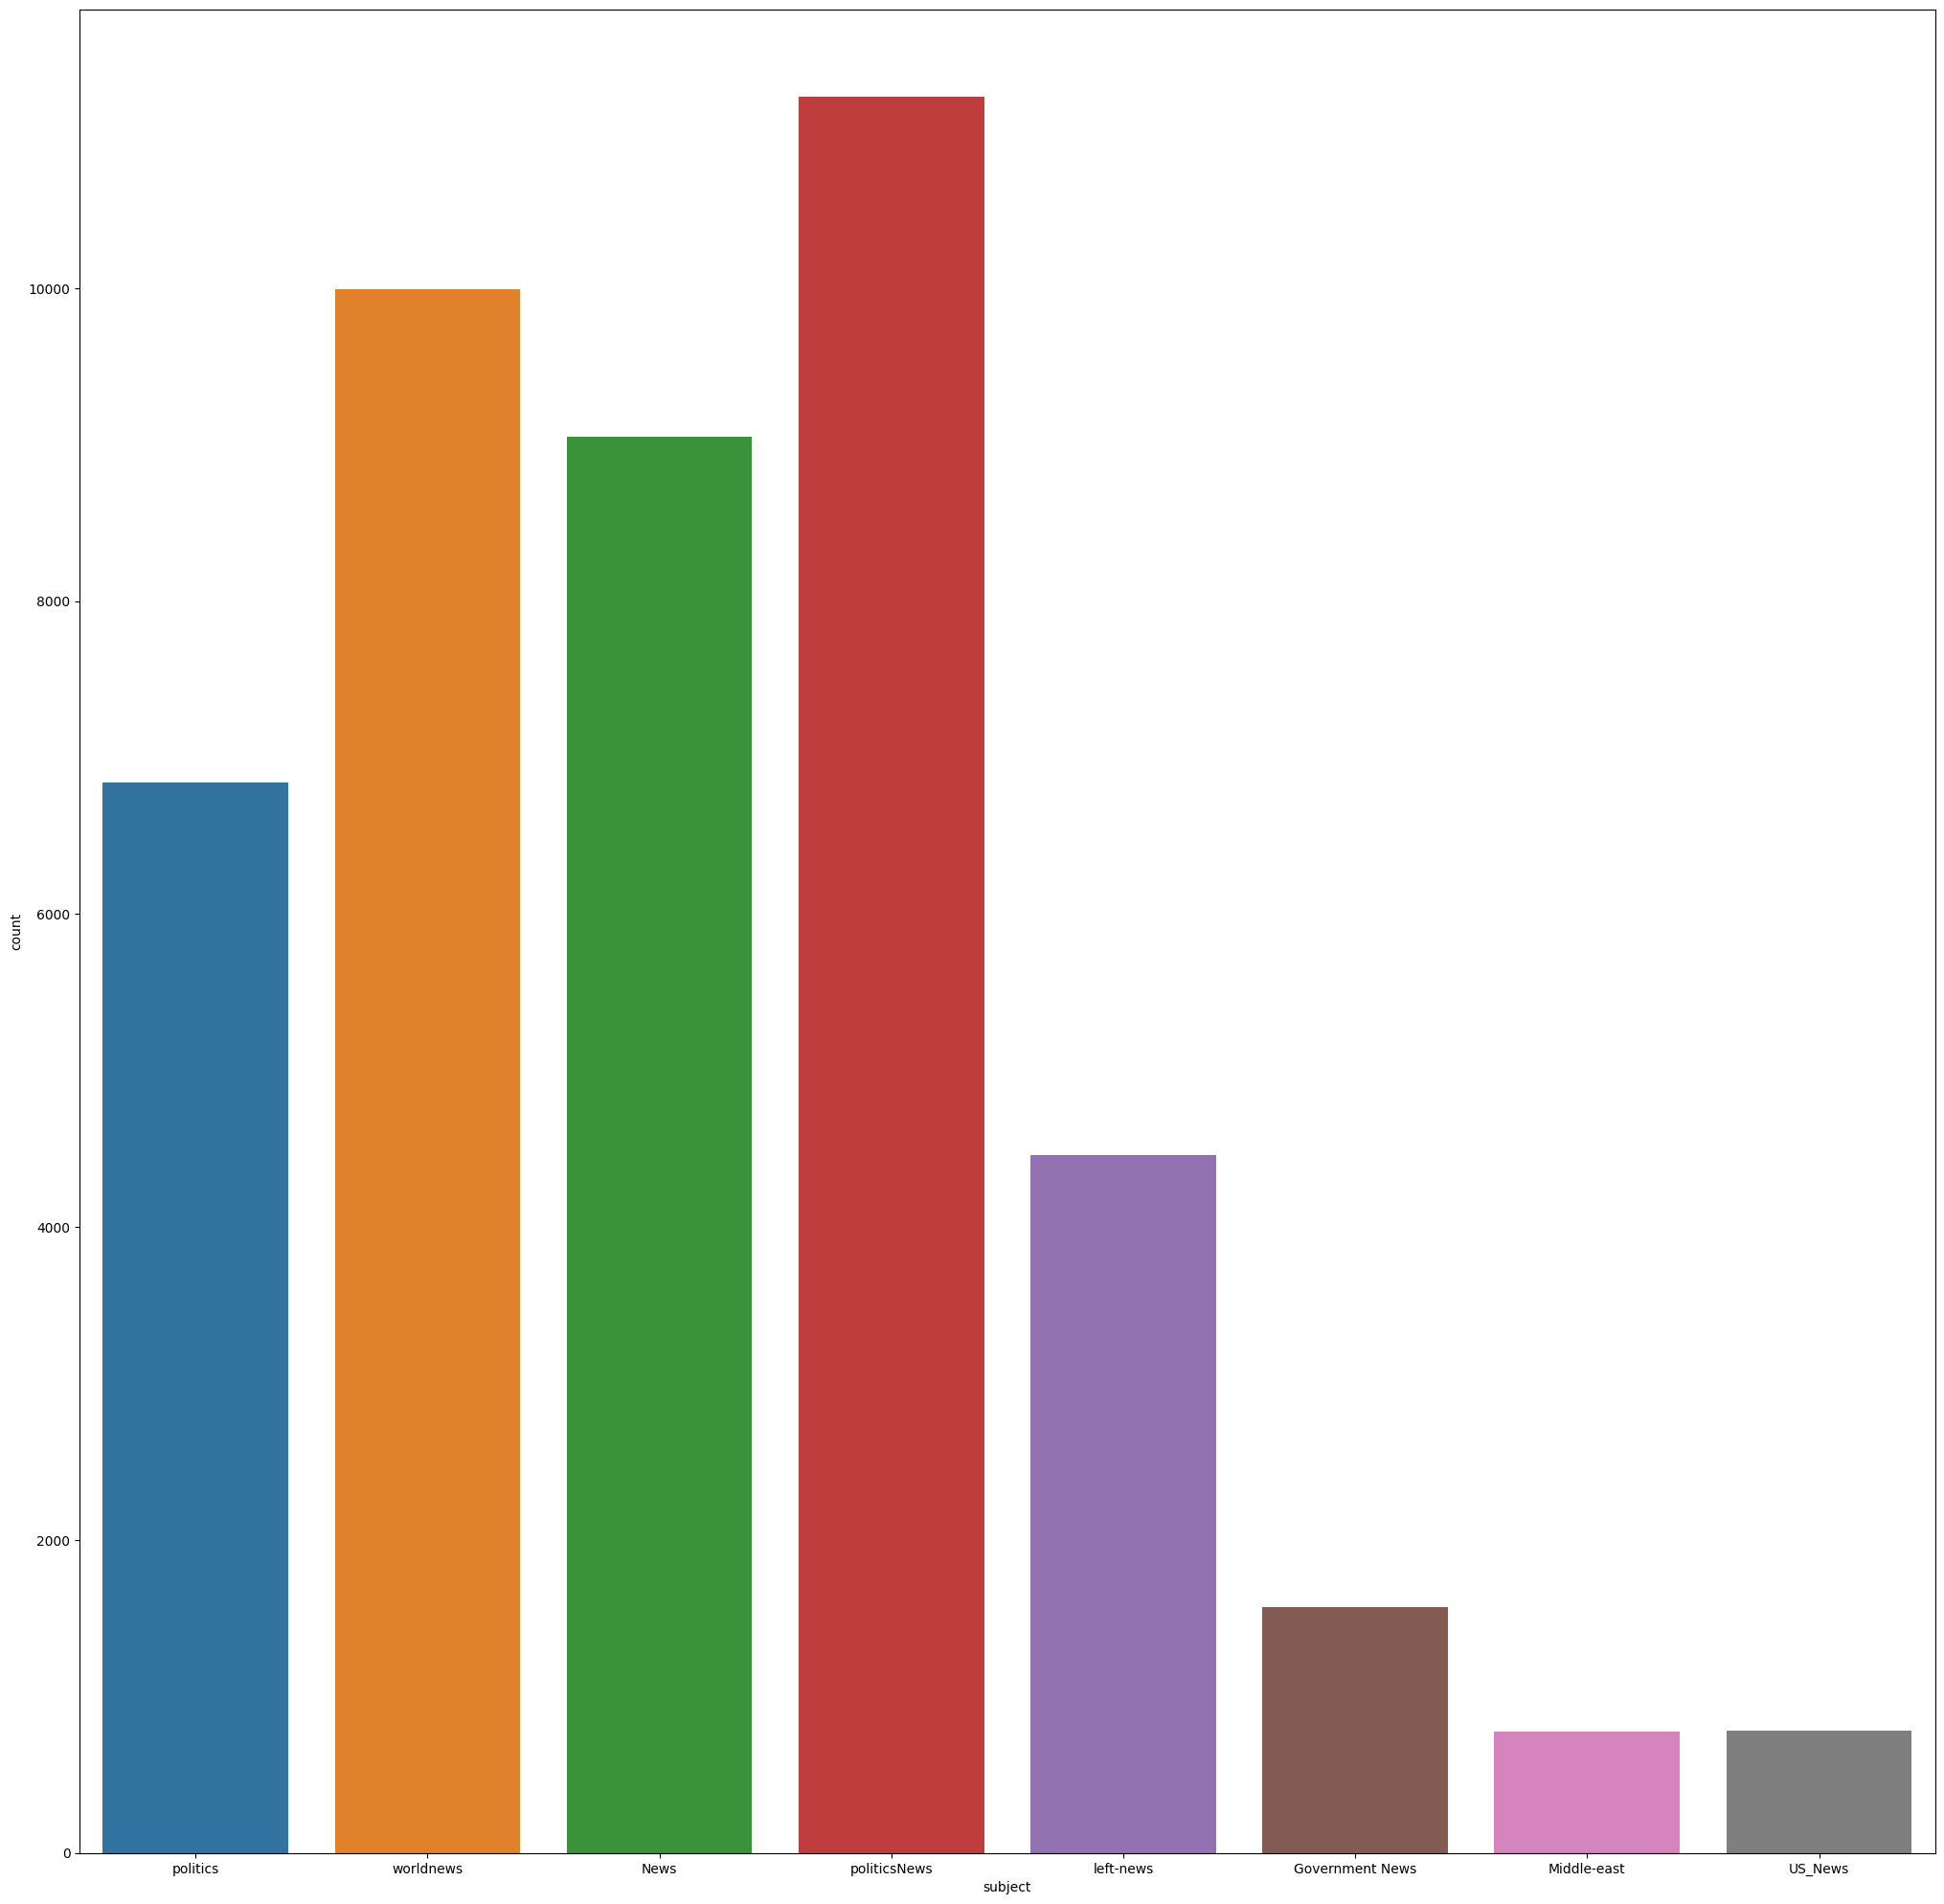

In [27]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.countplot(result, x="subject",ax=ax)
plt.show()

In [28]:
result["subject"].value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

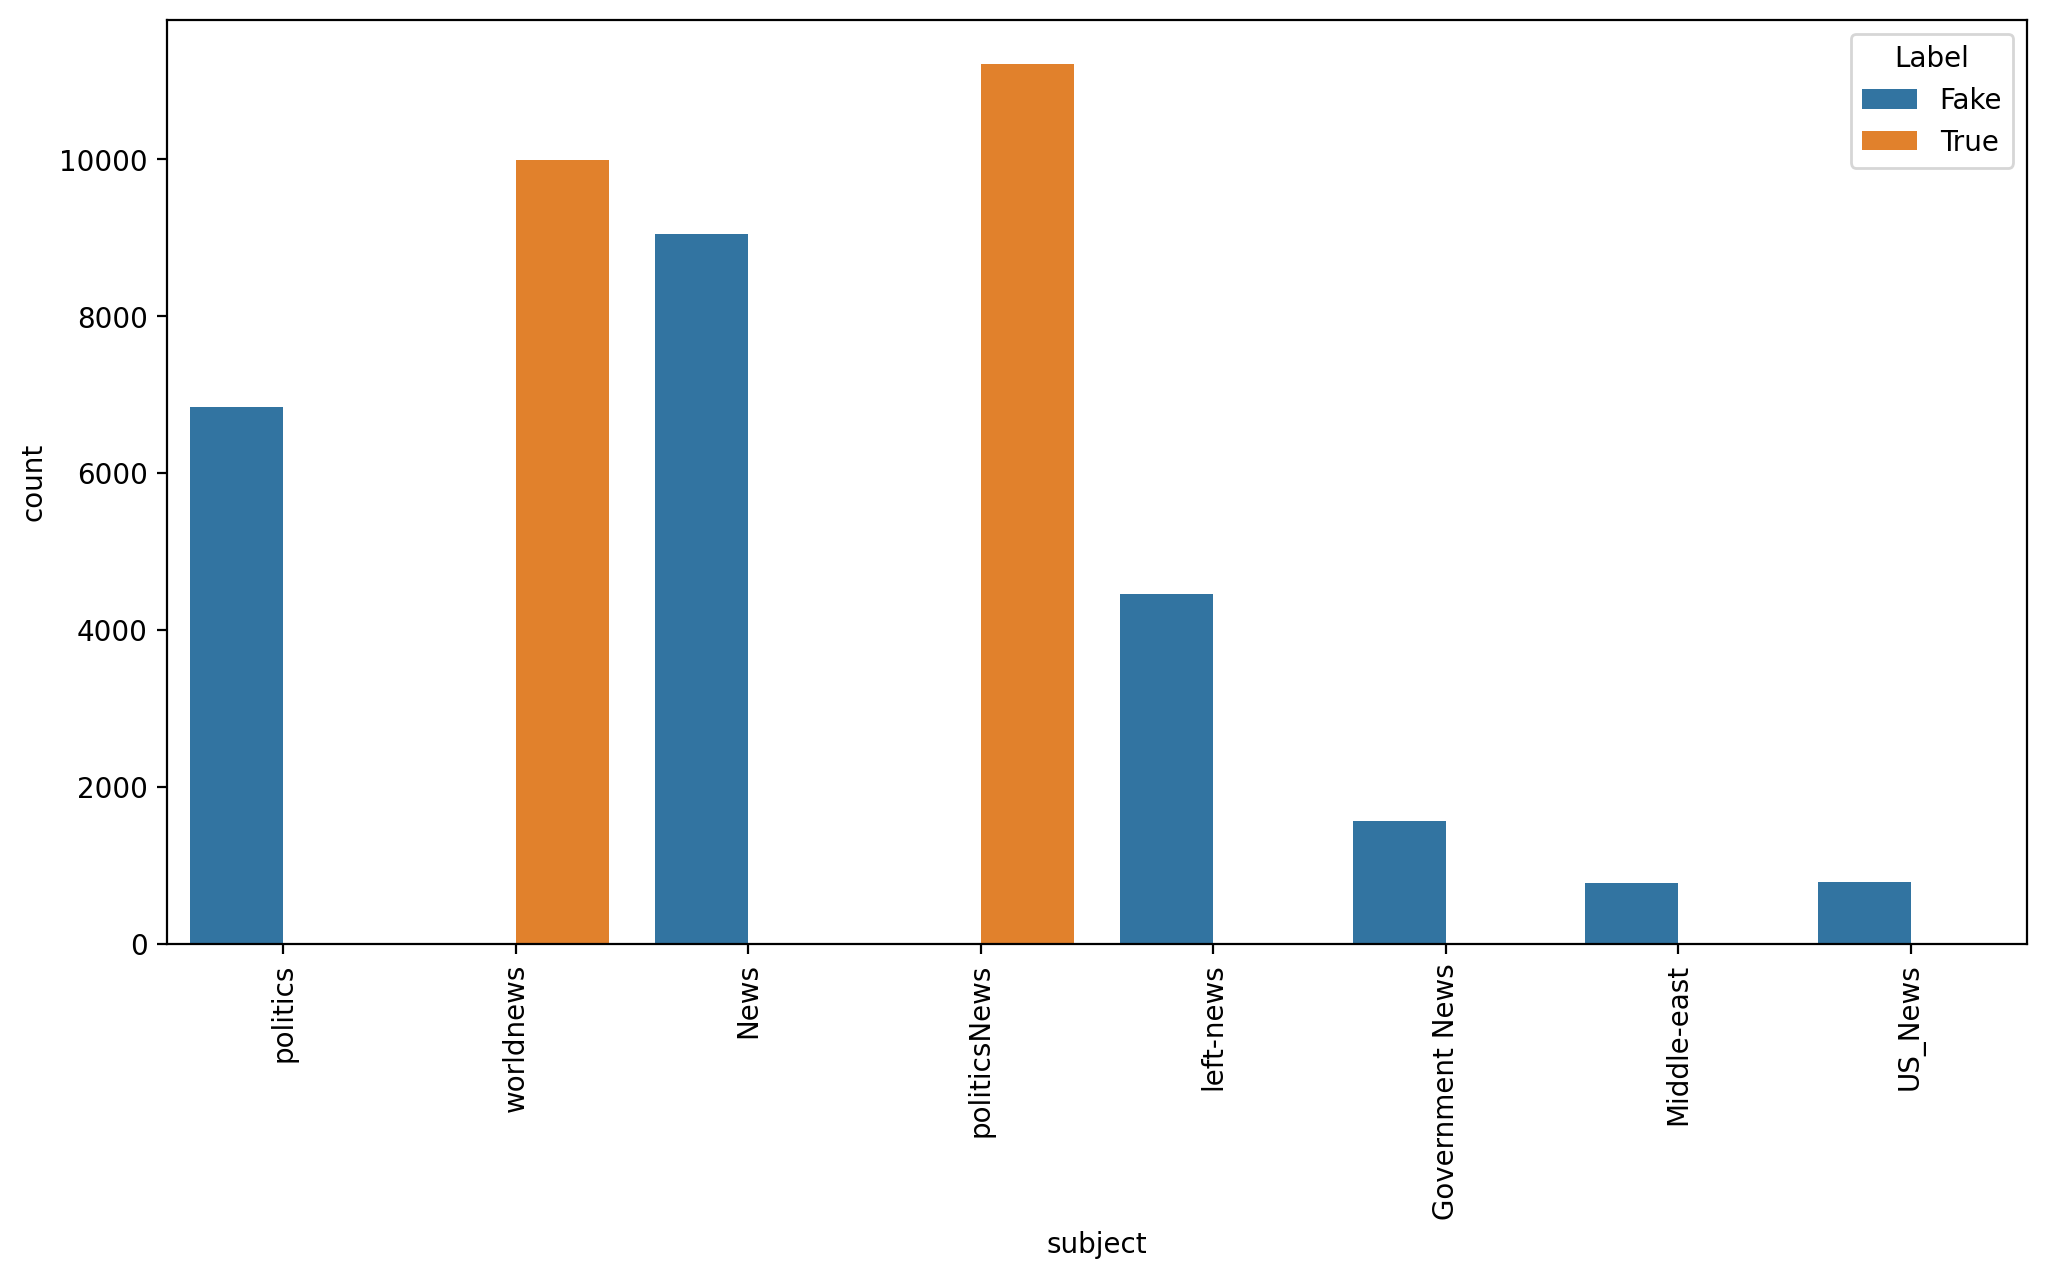

In [29]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(x='subject',data=result,hue='Label')
plt.xticks(rotation=90)
plt.show()

In [30]:
result['date_time'] = pd.to_datetime(result['date'],errors='coerce')

In [31]:
result['month'] = pd.DatetimeIndex(result['date_time']).month
result['year'] = pd.DatetimeIndex(result['date_time']).year

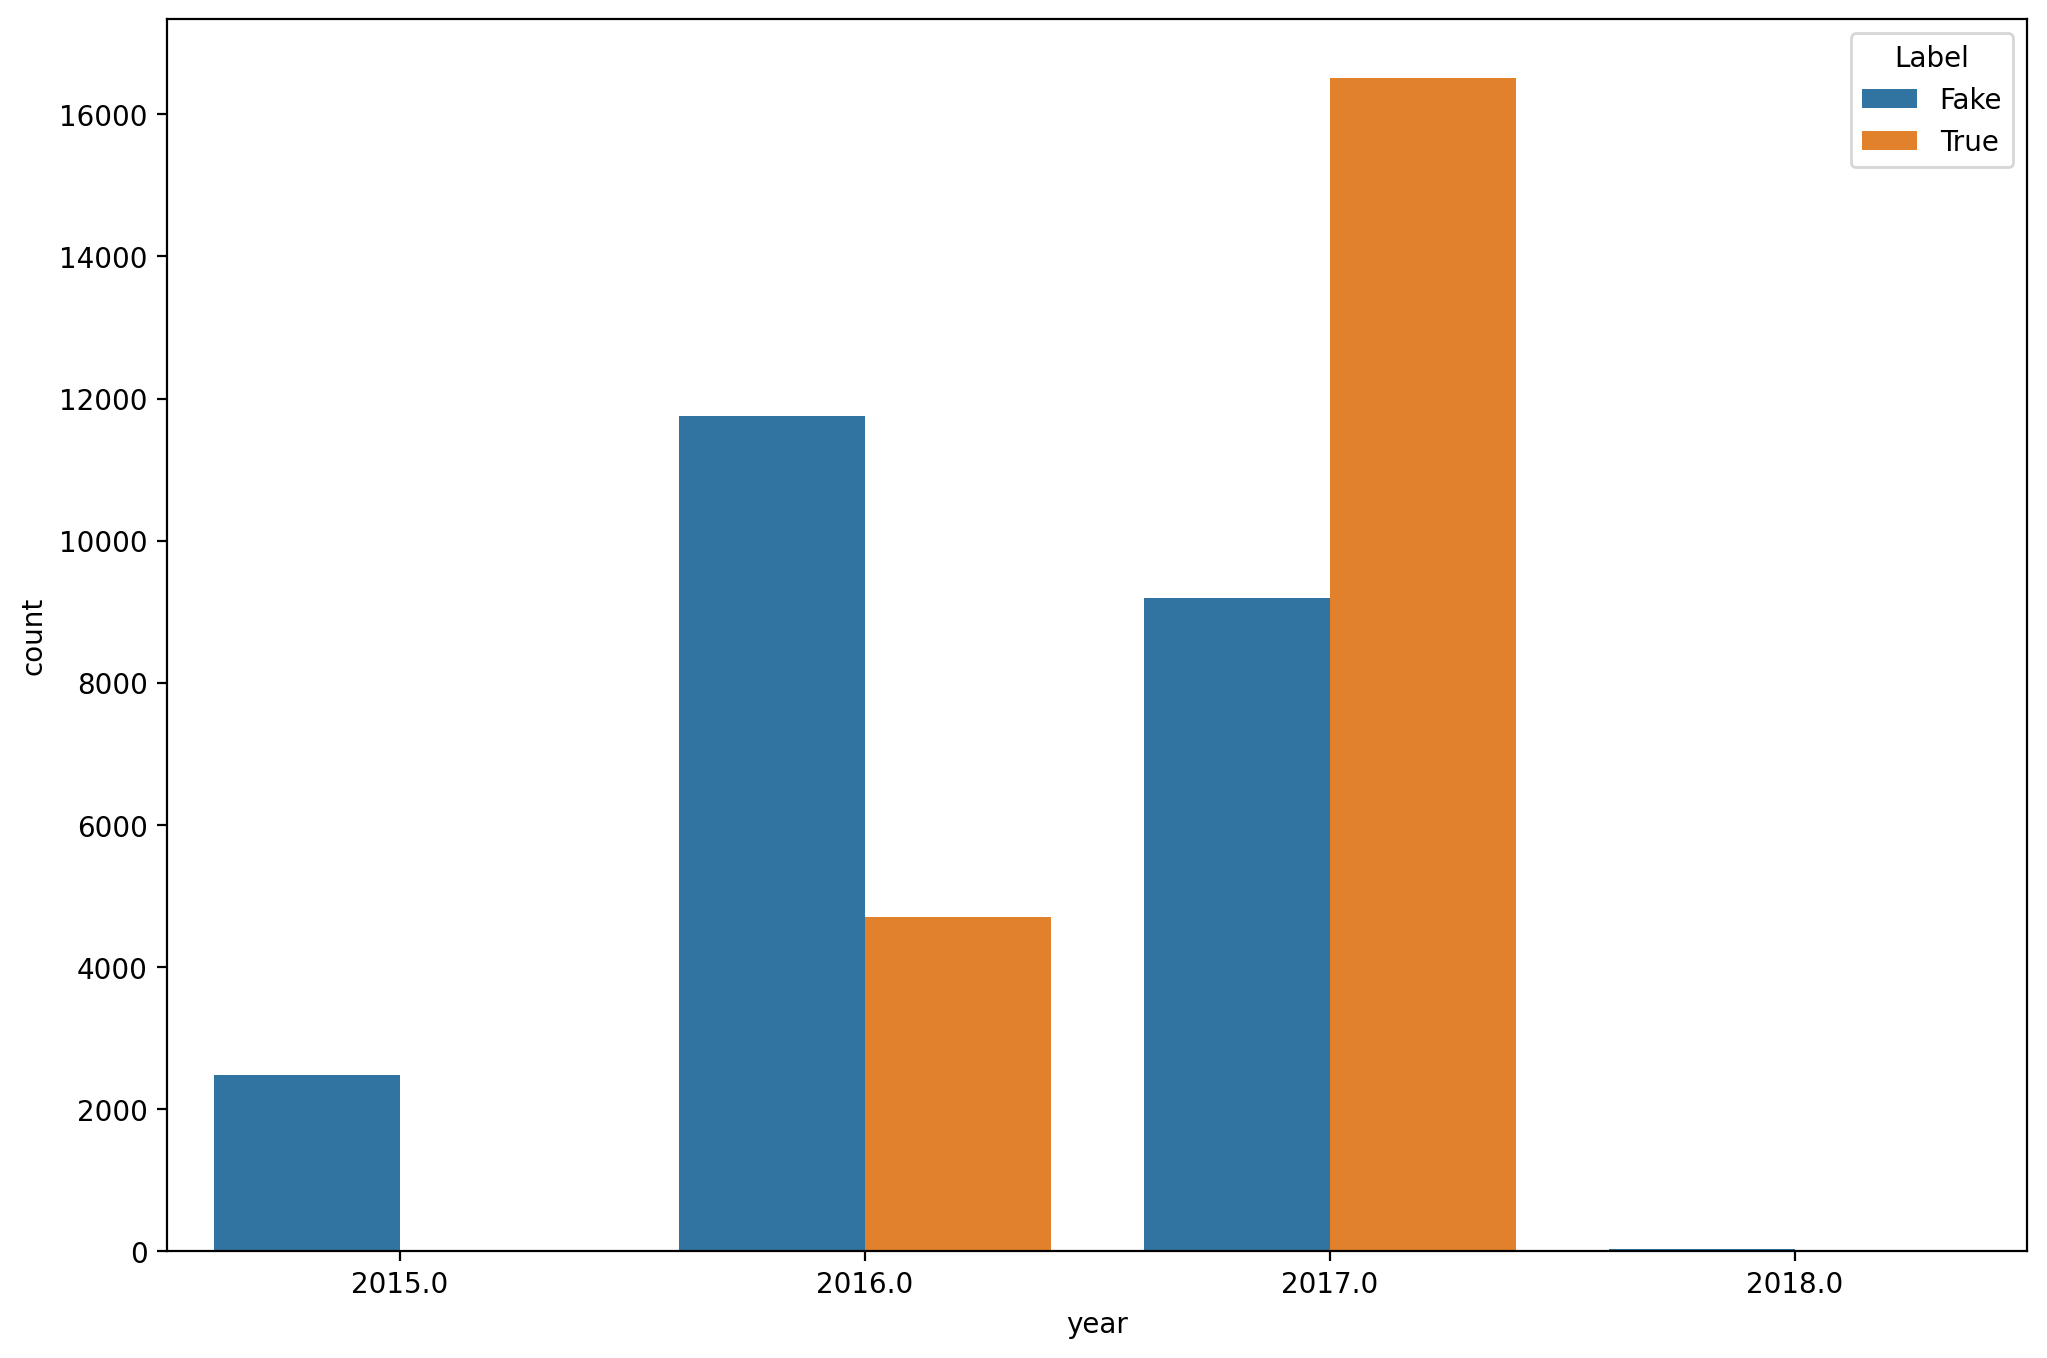

In [32]:
plt.figure(figsize=(12,8),dpi=200)
sns.countplot(x='year',data=result,hue='Label')
plt.show()

In [33]:
result['full_text'] = result['title'] + ' ' + result['text']

In [34]:
result['full_text'] = result['full_text'].apply(lambda x: x.lower())


In [35]:
import string
result['full_text']=result['full_text'].apply(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

In [36]:
result['full_text']=result['full_text'].str.replace('\d+', '')

<ipython-input-36-f2e848d68107>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  result['full_text']=result['full_text'].str.replace('\d+', '')


In [37]:
result['full_text']=result['full_text'].apply(lambda x: ' '.join(x.split()))

In [38]:
cv = CountVectorizer(stop_words='english')

In [39]:
matrix1 = cv.fit_transform(result[result['Label']=='Fake']['full_text'])

In [40]:
fqn = zip(cv.get_feature_names_out(),matrix1.sum(axis=0).tolist()[0])

In [41]:
print('Top 20 words in Fake News Articles')
print(sorted(fqn, key = lambda x: x[1],reverse=True)[:20])

Top 20 words in Fake News Articles
[('trump', 82823), ('said', 31206), ('president', 26702), ('people', 26480), ('just', 21580), ('obama', 20356), ('clinton', 19124), ('donald', 18062), ('like', 18000), ('video', 16193), ('hillary', 15831), ('new', 15059), ('news', 15006), ('white', 13629), ('time', 13006), ('state', 12981), ('media', 11677), ('america', 11231), ('house', 11108), ('campaign', 11036)]


In [42]:
matrix2 = cv.fit_transform(result[result['Label']=='True']['full_text'])
fqn1 = zip(cv.get_feature_names_out(),matrix2.sum(axis=0).tolist()[0])
print('Top 20 words in True News Articles')
print(sorted(fqn1, key = lambda x: x[1],reverse=True)[:20])

Top 20 words in True News Articles
[('said', 97861), ('trump', 58375), ('reuters', 28168), ('president', 26629), ('state', 20185), ('government', 18443), ('house', 17836), ('new', 17499), ('states', 16582), ('republican', 15891), ('united', 15403), ('people', 15158), ('told', 14112), ('party', 12627), ('washington', 12454), ('election', 11889), ('year', 11464), ('campaign', 10788), ('north', 10577), ('donald', 10437)]


The next section focuses on the suggestion of a fake news classification algorithm

In [43]:
import itertools
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


In [44]:
labels = result.Label

In [45]:
labels.head()

0    Fake
1    True
2    Fake
3    Fake
4    True
Name: Label, dtype: object

In [46]:
x_train, x_test, y_train, y_test = train_test_split(result['full_text'],labels,test_size=0.2,random_state=7)

In [47]:
#Enabling the TF-IDF Vectorizer and transformation of text data
tf_idf_vectorizer = TfidfVectorizer(stop_words='english',max_df=0.7)

In [48]:
#Train-Test Split
tf_id_train = tf_idf_vectorizer.fit_transform(x_train)
tf_id_test = tf_idf_vectorizer.transform(x_test)

In [49]:
#Support Vector Machine
svc = LinearSVC()
svc.fit(tf_id_train,y_train)

LinearSVC(C=1.0,class_weight=None,dual=True,fit_intercept=True,
          intercept_scaling=1,loss='squared_hinge',max_iter=1000,multi_class='ovr',
          penalty='l2',random_state=None, tol=0.0001, verbose=0)

y_pred_SVM = svc.predict(tf_id_test)
score = accuracy_score(y_test,y_pred_SVM)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:99.51%


In [50]:
y_pred_SVM

array(['Fake', 'Fake', 'True', ..., 'Fake', 'Fake', 'True'], dtype=object)

In [51]:
#Logistic Regression
lmmodel = LogisticRegression(solver='liblinear',random_state=0)
lmmodel.fit(tf_id_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0,solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

y_pred_LR = lmmodel.predict(tf_id_test)
scoring = accuracy_score(y_test,y_pred_LR)
print(f'Accuracy:{round(score*100,2)}%')


Accuracy:99.51%


In [52]:
#Passive Aggressive Classifier
Pa_classify = PassiveAggressiveClassifier(max_iter=50)
Pa_classify.fit(tf_id_train,y_train)

y_pdc = Pa_classify.predict(tf_id_test)
score = accuracy_score(y_test, y_pdc)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:99.37%


In [53]:
#Decision Tree
dc_classifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
dc_classifier.fit(tf_id_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0,class_weight=None,criterion='entropy',
                       max_depth=None,max_features=None,
                       max_leaf_nodes=None,min_impurity_decrease=0.0,
                       min_samples_leaf=1,min_samples_split=2,
                       min_weight_fraction_leaf=0.0,random_state=0,
                       splitter='best')

ypred_cl = dc_classifier.predict(tf_id_test)
score = accuracy_score(y_test, ypred_cl)
print(f'Accuracy:{round(score*100,2)}%')

Accuracy:99.44%
